In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

I first loaded the necessary libraries, then the file as a dataframe.

In [15]:
advertising = pd.read_csv(r"your_filepath\advertising.csv")

I delete the columns that won't be used in my analysis.

In [16]:
del advertising['Ad Topic Line']
del advertising['City']
del advertising['Male']
del advertising['Country']
del advertising['Timestamp']

Doing a quick check that my data is loaded correctly.

In [17]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


The first step of building a KNN model is to always scale the input data values. You can't compare the values until they are of proportion to each other. I used the StandardScaler function of scikit learn for this. I dropped the class column "Clicked on Ad" because that column contains output values.

In [18]:
scaler = StandardScaler()
scaler.fit(advertising.drop('Clicked on Ad', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

After scaling all the values, I used the transform function to combine all the data into a list of arrays. Those arrays are then structured into a dataframe.

In [19]:
scaled_features = scaler.transform(advertising.drop('Clicked on Ad', axis = 1))
scaled_dataframe = pd.DataFrame(scaled_features, columns = advertising.columns[:-1])

Next is the actual training of the model. Standard train test split in scikitlearn

In [20]:
x = scaled_dataframe
y = advertising["Clicked on Ad"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

I used scikitlearn's KNeighborsClassifier function to set k = 1 (for now), and then I used the fit function to fit our trained data to my empty model represented by variable 'knn.'

In [22]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

The final step is a variable that produces our desired result of the outcome prediction: Class 0 or Class 1. The model is now complete. To use the model, simply slot a scaled set of input data into the knn.predict function (Replace x_test).

In [24]:
prediction = knn.predict(x_test)

I used a confusion matrix and f1 score to test the accuracy of my model.

In [26]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[149   8]
 [  9 134]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       157
           1       0.94      0.94      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Now that I have the model built, I optimized it by finding the k with the lowest error rate. In other words it's the k value that fits the existing data the best.

In [28]:
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    prediction_i = knn.predict(x_test)
    error_rate.append(np.mean(prediction_i != y_test))

This plots out Error Rate as a function of different k values. By using the graph, I could visually see which k value best fit the data.

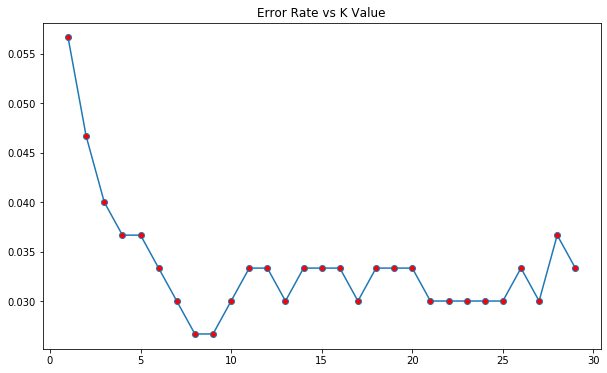

In [31]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 30), error_rate, marker = "o", markerfacecolor = "red")
plt.title("Error Rate vs K Value")
plt.xlabel = "k"
plt.ylabel = "error rate"

The last step is to simply replace the previous k with the most optimal k and refit the data with the new k.

In [33]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)